# REPORTE 8:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
import plotnine as p
from causalgraphicalmodels import CausalGraphicalModel
import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
#import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import pyreadr

Trabajo conjunto con Roxana Rodríguez (20200373) y Greysi Arrelucea (20200279)

## Parte 1: Código

## Instrumental Variables

#### 1.1) Explique en qué consiste el supuesto de "Relevance"

La relevancia es importante porque  nos permite ver los supuesto de identifiación y uso de variables instrumentale de manera más segura pra así saber que 'z' (el instrumento) realmente se relaciona con 'x' (el tratamiento). De esta manera, se busca que las variables instrumentales si funcionene al buscar evitar a la endogeneidad (D),  que la variable independiente se correlaciona con el término de error en una regresión. Es así como la relevancia mira la relación entre 'x' y 'z' y vea cuán fuerte es. Cuanto más fuerte sea, más confianza tendrá en la suposición de relevancia y menos saltará la estimación de una muestra a otra.

#### 1.2) Explique en qué consiste el supuesto de "Validity"

La validez se entiende en tanto cualquier ruta entre el instrumento Z y el resultado Y debe pasar por el tratamiento X o cerrarse para ser válido la suposición. Sin embargo, la validez también se la reconoce por 'restricción de exclusión' porque es una suposición de que Z puede excluirse razonablemente del modelo de Y después de que se incluye la ruta Z → X. Entonces, para que la suposición de validez se cumpla para Z, necesitamos cerrar tanto Z ← B →Y  camino como el camino veamos Z → A → Y. Si podemos controlar tanto como A y B , todo está bien. En este sentido, la validez es la suposición de que el instrumento 'z' es una variable que 'no tiene puertas traseras abiertas propias'.

## Ploteo de Histogramas

#### 2.1) Grafique dos histogramas para la variable años de educación "educ" para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.

In [2]:
# se carga la data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


- Histogramas separados de la variable educ (años de eduación) a partir de la variable nearc4(si existe o no una institución de educación superior) cuando es ==0 o ==1 

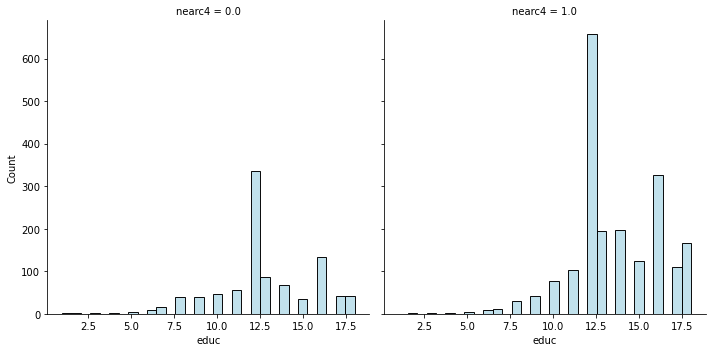

In [3]:
sns.displot(card, x="educ", col="nearc4", color='lightblue') 

Text(8.557222222222222, 0.5, 'Frecuencia')

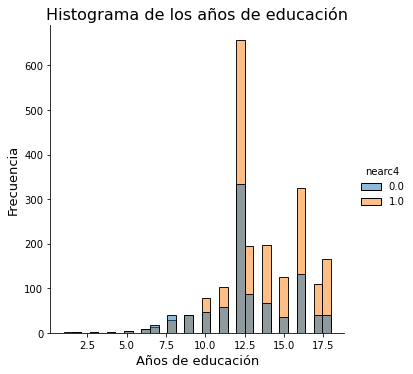

In [4]:
sns.displot(card, x="educ", hue="nearc4")  
plt.title("Histograma de los años de educación", fontsize=16)
plt.xlabel("Años de educación", fontsize=13)
plt.ylabel("Frecuencia", fontsize=13)

- Interpretación

De los gráficos observados, se puede evidenciar que la proximidad de una institución de educación superior está correlacionado con el aumento de años de educación, es decir, se podría decir que la presencia de universidades de 4 años aumentan la probabilidad de ir a la universidad y continuar los estudios superiores. Mientras que la no presencia cercana de institutos superiores de educación no presenta una tan fuerte correlación si la comparamos con la situación anterior. Por ejemplo, aunque cuando los años de educación son alrededor de 12.5 años, ambos casos, presencia o no presencia de universidad, están presentes, pero la probabilidad de continuar sus estudios aumenta mucho más cuando si hay una universidad cerca a su lugar de residencia. Al analizar la tendencia y distribución, podemos decir que mientras haya universidades de 4 años de estudios cerca al lugar de residencia, la probabilidad de estudiar o continuar con estudios superiores aumenta considerablemente. Esto puede darse porque al tener un instituto educativo superior cerca a su residencia no tienen que gastar en transporte público, alimento o alquilers, etc. 

#### 2.2) Grafique dos histogramas para la variable años del logaritmos de los ingresos "lwage" (logaritmo de ingresos) para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.

- Histogramas separados de la variable lwage (logaritmos de los ingresos) a partir de la variable nearc4(si existe o no una institución de educación superior o no) cuando es ==0 o ==1 

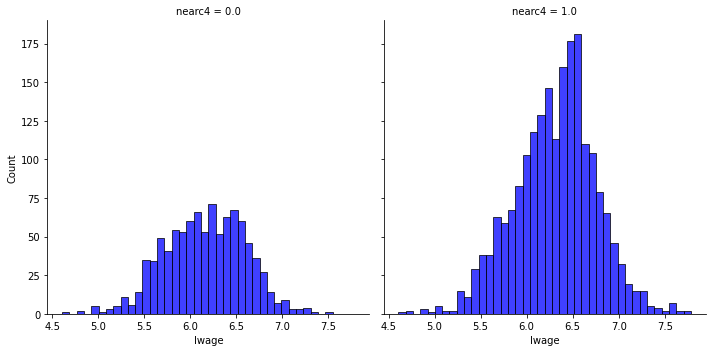

In [5]:
sns.displot(card, x="lwage", col="nearc4", color='blue') 

Text(8.557222222222222, 0.5, 'Frecuencia')

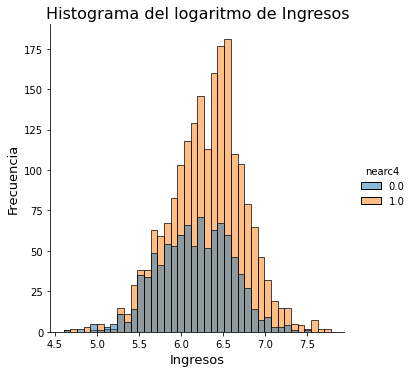

In [8]:
sns.displot(card, x="lwage", hue="nearc4", color='blue') 
plt.title("Histograma del logaritmo de Ingresos", fontsize=16)
plt.xlabel("Ingresos", fontsize=13)
plt.ylabel("Frecuencia", fontsize=13)

- Interpretación:

A partir de estos gráficos podemos saber si la proximidad a una univerisadad de 4 años de estudios tiene efecto o se correlaciona con el logaritmo de los ingresos. En ambos casos, tanto cuando hay y no hay universidades, presentan una distribución normal que nos señala que existe una distribución simétrica entre los datos. Sin embargo, a pesar de esto, el impacto de la presencia cercana de estas instituciones superiores en los logaritmos de ingreso son más visibles y significativos. Desde el punto 5.5 a 7.0 se aprecia como cuanto más aumenta el ingreso, más aumenta también la presencia de universidades. Existe una diferencia significativa entre ambos casos y parece ser que la presencia de universidades si tiene un efecto/relación significativa sobre el logaritmo de ingresos. 

### 3. Regresiones

#### 3.1) Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.

In [9]:
#OLS
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        14:50:50   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Explicación de resultados:

En este modelo no está presente ni la varible nearc4 ni nearc2, así que estamos analizando un modelo que busca saber la correlación de otras variables sobre el aumento y/o disminución de la variable logaritmo de ingresos. Todas las variables son significativas ya que su p-value es menor a 0,05, pero el R2 del modelo nos indicia que este modelo explica en un 30.5% la variabilidad del resultado/de la variable dependiente (logaritmos del ingreso), y por ende no es un modelo muy fuerte. Si nos enfocamos en la variable años de educación podemos ver que por cada aumento de los años de educación, aumenta el ingreso de los encuestados en un 7.1%.

In [10]:
#Al haber valores invalidos se rellenan con otros datos (0).
card['married'] = card['married'].fillna(0)

#### 3.2) Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con nearc2 .
La regressión debería tener una forma de este tipo "lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc2]".

In [11]:
#IV2SLS
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2 ]", card).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Sun, Nov 13 2022   P-value (F-stat)                0.0000
Time:                        14:51:52   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

- Interpretación: 

En este modelo se ha instrumentalizado la regresión lineal con las variables años de educación junto con la cercanía de institutos educativos superiores de 2 años. Podemos observar ahora que no todas las variables son significativas, solo las variables años de experiencia y años de educación (es 0,0504, pero lo tomaremos en cuenta). Por cada año adicional de estudios, los ingresos de los estudiantes aumenta aproximadamente un 36%. De acuerdo a esto, podemos decir que encontramos un mayor aumento del ingreso en este modelo en comparación con el OSL. El modelo presenta un r ajustado negativo que señala que es neutral frente a la introducción de variable adicionales. Asimismo, el F statistic excede 15, lo cual sugiere que no tenemos un problema de instrumento débil. 

- Compare los resultados encontrados en la regresión de arriba. Cambió el coeficiente relacionado a educ , por qué?

Entonces, el cambio de coeficiente de la variable años de educación (educ) está relacionado con la introducción e instrumentalización de la variable instituto educativo superior de 2 años (nearc2) presente en el modelo. Se confirma entonces que la presencia de universidades o institutos superiores cerca al lugar de residencia si juegan un papel importante en la continuación de los estudios. 

## Parte 2: Reporte

La pregunta de investigación es: ¿Cómo afectó la asignación de la mita en el desarrollo económico contemporáneo peruano? Asimismo, a través de este análisis se busca identificar como la mita minera impactó los canales de la tenencia de la tierra, la participación en el mercado y los bienes públicos. Este estudio se realiza mediante una regresión discontinua que analiza estos efectos a largo plazo, y plantea la hipótesis de que los efectos de largo plazo disminuyeron el consumo doméstico en cerca del 25% e incrementan el retraso del crecimiento de los niños en unos seis puntos porcentuales.

Una fortaleza de este estudio es que, a diferencia de otros estudios que han buscado encontrar el impacto de la historia sobre resultados económicos contemporáneos, se han centrado en los canales de persistencia. En específico, y como ha sido mencionado anteriormente, se centraron en la tenencia de la tierra, los bienes públicos y la participación en le mercado para medir el efecto de la mita minera. Asimismo, esta decisión y el resto del estudio emplearon datos del imperio español y de la República del Perú lo cuál permitió un análisis más cualitativo, más histórico y global. De la misma manera, otra fortaleza es el enfoque de regresión discontinua (RD) para evaluar los efectos de largo plazo de la mita que permitieron hacer un corte para asignar un determinado marco de asignación y así estimar el correcto efecto en una determinada zona, en este caso la cordillera de los Andes en el sur del Perú. Asimismo, esto se complementa con una adaptación del enfoque a uno semiparamétrico que permite limitar la muestra a distritos ubicados dentro de los 50 kilómetros del límite de la mita. Esto es importante porque permite un análisis más focalizado que la aleatorización no permitiría, así como identificar efectos causales sin que esto se vea afectado por la discontinuidad en la implementación del tratamiento/análisis en las zonas no tomadas en cuenta. 

A pesar de los beneficios de utilizar este enfoque, debido a los requisitos de información necesario para una RD, es muy difícil conseguir las georreferencias precisas ya que son de confidencialidad y porque muchos de los datos necesarios para investigar los efectos a largo plazo de la mita no ofrecen tamaños muestrales muy grandes para emplear técnicas no paramétricas. Asimismo, a pesar de la gran cantidad de información adquirida y comparada entre los datos del imperio español y la República, aun así hubo escasez de información y patrones de herencia lo cuál sería fundamental para avanzar la investigación sobre el impacto de la mita en la actualidad. Otra debilidad de este estudio y específicamente sobre el enfoque es que es posible que no se hayan tomado en cuenta ciertas características no observables que hayan influenciado el impacto de la mita en el desarrollo económico ya que desde el inicio delimita una muestra de estudio y esto podría llevar a un sesgo de selección, así como incapacidad de poder ver el impacto en aquellas zonas más lejanas, fueras del umbral seleccionado. 

En todo caso, este estudio contribuye a los estudios que respaldan la hipótesis acerca de cómo las instituciones extractivas históricas influyen en la prosperidad económica a largo plazo, es decir, existe una relación causal entre las instituciones históricas y los resultados económicos contemporáneos a partir del uso de datos agregados. Asimismo, logra, mediante esta vinculación positiva, contra refutar con la conocida hipótesis de que la gran desigualdad histórica en el acceso a la tierra es la causa fundamental en el largo plazo del escaso crecimiento de América Latina. En el caso peruano, los distritos no sujetos a la mita tuvieron propiedades más grandes que pudieron haber sido distribuidas a los pequeños propietarios durante la Reforma Agraria. En este sentido, el acceso a la tierra no es la principal causa en el largo plazo del escaso crecimiento de América Latina. Más bien, con este estudio se logró evidenciar que los grandes terratenientes, sin la intención de promover la prosperidad económica, les ofrecieron a los individuos una coartada frente a la explotación de un Estado altamente extractivo y garantizaron bienes públicos. Esto significa que las restricciones respecto a como el Estado puede ser utilizado para moldear las interacciones económicas es un mejor punto de partida que la desigualdad en el acceso a la tierra para modelar la trayectoria del crecimiento de largo plazo de Latinoamérica.

Finalmente, los principales pasos a seguir en este tema de investigación sería continuar estudiando el impacto de las instituciones junto con otras variables en el desarrollo actual de la población. Por ejemplo, algunos estudios toman en cuenta tanto la variable de instituciones históricas en conjunto con el capital humano. Acemoglu et al. (2014) se enfocan en diferencias históricamente determinadas en el capital humano y controlamos el efecto de las instituciones históricas, el impacto de las instituciones en el desarrollo a largo plazo es sólido, mientras que las estimaciones del efecto del capital humano se reducen mucho y se vuelven consistentes con las estimaciones micro. En este sentido, las dotaciones del capital humano de los colonizadores han sido importante en el desarrollo de instituciones posteriores. Por otro lado, algunos hacen mayor énfasis en específicos tipos de instituciones como es en el caso del estudio de Robinson (2016). Él señala que la persistencia del subdesarrollo económico en Colombia es consecuencia de facetas extractivas de las instituciones políticas y económicas que han perdurado en el tiempo debido a la creación de un Estado débil e inefectivo debido a estructuras coloniales de poder y poderosas fuerzas actuales de las élites que mantienen esta dinámica. Por esta razón, sería interesante analizar también en el Perú, ya no solo las estructuras pasadas que todavía tienen un impacto en la actualidad, sino las fuerzas que permiten su continuo efecto. 

BIBLIOGRAFÍA:

Acemoglu, D., Gallego, F. A., & Robinson, J. A. (2014). Institutions, human capital, and development. Annu. Rev. Econ., 6(1), 875-912.
Robinson, J. A. (2015). The misery in Colombia. Desarrollo y sociedad, (76), 9-90.
